# 1 KNN_self

## 1.1 查看图片

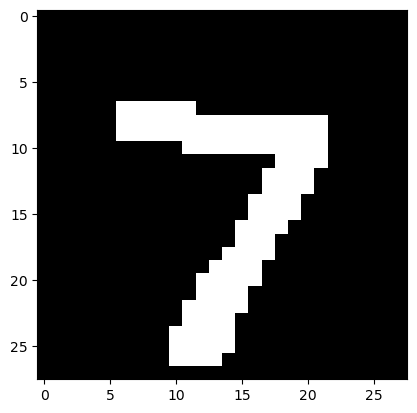

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import os

# 读入mnist数据集
m_x = np.loadtxt('mnist_x.txt', delimiter=' ')
m_y = np.loadtxt('mnist_y.txt')

# 数据集可视化
data = np.reshape(np.array(m_x[0], dtype=int), [28, 28])
plt.figure()
plt.imshow(data, cmap='gray')
pylab.show()




In [2]:
# 将数据集分为训练集和测试集
ratio = 0.8
split = int(len(m_x) * ratio)
# 打乱数据
np.random.seed(0)
idx = np.random.permutation(np.arange(len(m_x)))
m_x = m_x[idx]
m_y = m_y[idx]
x_train, x_test = m_x[:split], m_x[split:]
y_train, y_test = m_y[:split], m_y[split:]
def distance(a, b):
    return np.sqrt(np.sum(np.square(a - b)))
class KNN:
    def __init__(self, k, label_num):
        self.k = k
        self.label_num = label_num # 类别的数量

    def fit(self, x_train, y_train):
        # 在类中保存训练数据
        self.x_train = x_train
        self.y_train = y_train

    def get_knn_indices(self, x):
        # 获取距离目标样本点最近的K个样本点的标签
        # 计算已知样本的距离
        dis = list(map(lambda a: distance(a, x), self.x_train))
        # 按距离从小到大排序，并得到对应的下标
        knn_indices = np.argsort(dis)
        # 取最近的K个
        knn_indices = knn_indices[:self.k]
        return knn_indices

    def get_label(self, x):
        # 对KNN方法的具体实现，观察K个近邻并使用np.argmax获取其中数量最多的类别
        knn_indices = self.get_knn_indices(x)
        # 类别计数
        label_statistic = np.zeros(shape=[self.label_num])
        for index in knn_indices:
            label = int(self.y_train[index])
            label_statistic[label] += 1
        # 返回数量最多的类别
        return np.argmax(label_statistic)

    def predict(self, x_test):
        # 预测样本 test_x 的类别
        predicted_test_labels = np.zeros(shape=[len(x_test)], dtype=int)
        for i, x in enumerate(x_test):
            predicted_test_labels[i] = self.get_label(x)
        return predicted_test_labels
for k in range(1, 10):
    knn = KNN(k, label_num=10)
    knn.fit(x_train, y_train)
    predicted_labels = knn.predict(x_test)

    accuracy = np.mean(predicted_labels == y_test)
    print(f'K的取值为 {k}, 预测准确率为 {accuracy * 100:.1f}%')

K的取值为 1, 预测准确率为 88.5%
K的取值为 2, 预测准确率为 88.0%
K的取值为 3, 预测准确率为 87.5%
K的取值为 4, 预测准确率为 87.5%
K的取值为 5, 预测准确率为 88.5%
K的取值为 6, 预测准确率为 88.5%
K的取值为 7, 预测准确率为 88.0%
K的取值为 8, 预测准确率为 87.0%
K的取值为 9, 预测准确率为 87.0%


# KNN_sk

from sklearn.neighbors import KNeighborsClassifier # sklearn中的KNN分类器
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

# 读入高斯数据集
data = np.loadtxt('gauss.csv', delimiter=',')
x_train = data[:, :2]
y_train = data[:, 2]
print('数据集大小：', len(x_train))

# 可视化
plt.figure()
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c='blue', marker='o')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='red', marker='x')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

# 设置步长
step = 0.02
# 设置网格边界
x_min, x_max = np.min(x_train[:, 0]) - 1, np.max(x_train[:, 0]) + 1
y_min, y_max = np.min(x_train[:, 1]) - 1, np.max(x_train[:, 1]) + 1
# 构造网格
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
grid_data = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)

fig = plt.figure(figsize=(16,4.5))


ks = [1,3,10]
cmap_light = ListedColormap(['royalblue','lightcoral'])

for i, k in enumerate(tqdm(ks)):
    # 使用KNN分类器
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # 预测网格数据
    y_pred = knn.predict(grid_data)
    # 绘制网格
    ax = fig.add_subplot(1, 3, i+1)
    ax.pcolormesh(xx, yy, y_pred.reshape(xx.shape), cmap=cmap_light)
    ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c='blue', marker='o')
    ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='red', marker='x')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(f'K = {k}')
plt.show()